<a href="https://colab.research.google.com/github/nikit34/training_DS/blob/main/custom_StochasticGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [435]:
data = pd.read_csv('dataset.csv', sep=',')

In [436]:
x = data['weight']
y = data['height']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

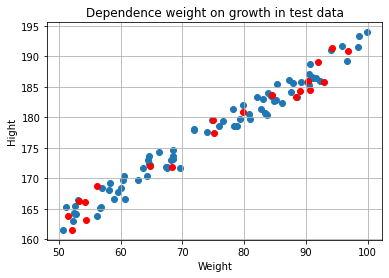

In [437]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
plt.grid()
plt.title('Dependence weight on growth in test data')
plt.xlabel('Weight')
plt.ylabel('Hight')
plt.show()    

In [438]:
x_tmp = np.array(x_train, dtype=np.float128).reshape(-1,1)
y_tmp = np.array(y_train, dtype=np.float128).reshape(-1,1)

# if do normalization, the number of training periods increases and more memory is required for higher precision numbers
# scaler = preprocessing.MaxAbsScaler()
# x_tmp = scaler.fit_transform(x_tmp)
# y_tmp = scaler.fit_transform(y_tmp)

x_train = pd.DataFrame(x_tmp)
y_train = pd.DataFrame(y_tmp)

In [439]:
class StochasticGradientDescent:
    def __init__(self, learn_rate=0.0001, num_iterate=1000, k=5):
        self.learn_rate = learn_rate
        self.num_iterate = num_iterate
        self.k = k
        
        self.weight = None
        self.bias = None
        
        self.history = []

    def fit(self, x_train, y_train):
        len_train = len(x_train)

        if len_train != len(y_train) or len_train == 0:
            raise IndexError("Dimension of data does not match pattern")

        weight_current = np.zeros(shape=(1, x_train.shape[1]))
        bias_current = 0
        current_iterate = 1

        while current_iterate <= self.num_iterate:
            weight_old = weight_current
            bias_old = bias_current

            weight_tmp = np.zeros(shape=(1, x_train.shape[1]))
            bias_tmp = 0

            random_indexes = np.random.choice(len_train, replace=False, size=self.k) # return rundom indexes (random_state for reproducibility)
            x = np.array(x_train.iloc[random_indexes, :])
            y = np.array(y_train.iloc[random_indexes, 0])

            for i in range(len(x)):
                # 'Implicit updates', where -2/k  - can take any number between 0 and 1 or other method optimizing
                weight_tmp += x[i] * (y[i] - np.dot(weight_old, x[i]) + bias_old) * (-2 / self.k)  
                bias_tmp += (y[i] - (np.dot(weight_old, x[i]) + bias_old)) * (-2 / self.k)

            weight_current = weight_old - self.learn_rate * weight_tmp
            bias_current = bias_old - self.learn_rate * bias_tmp
            
            self.history.append(weight_current[0][0])
            if (weight_old == weight_current).all(): # stopped learning 
                break
            current_iterate += 1

        self.weight = weight_current
        self.bias = bias_current
        return weight_current, bias_current

    def predict(self, x):
        if self.weight is None or self.bias is None:
            raise Warning("Used parameters dont change")
        y_pred = []
        x = np.array(x)
        for i in range(len(x)):
            y = np.dot(self.weight[0], x[i]) + self.bias
            y_pred.append(y.item())
        return np.array(y_pred)  

    def draw_history_mce(self):
        plt.title('Dependence of weight on epoch number')
        plt.plot(range(self.num_iterate), self.history)
        plt.show()

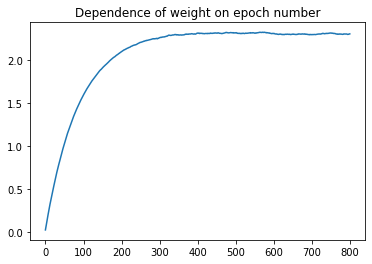

In [440]:
# num_iterate=800 since coefficient does not change according to chart below
# learn_rate=0.000001 since the dependence is smoother - check through Min Max coeffcoefficient weight
SGD = StochasticGradientDescent(learn_rate=0.000001, num_iterate=800)  
SGD.fit(x_train, y_train)
SGD.draw_history_mce()
y_pred = SGD.predict(x_test)

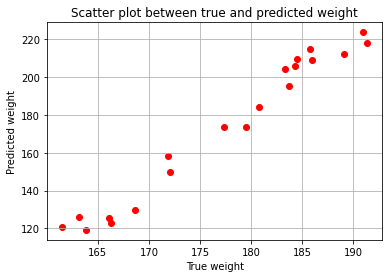

In [441]:
plt.scatter(y_test, y_pred, color='r')
plt.grid()
plt.title('Scatter plot between true and predicted weight')
plt.xlabel('True weight')
plt.ylabel('Predicted weight')
plt.show()    

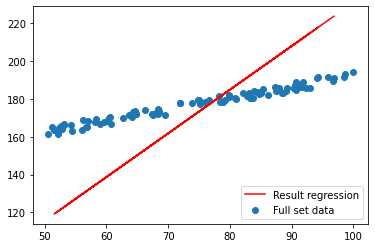

In [442]:
full_data = plt.scatter(x, y, label='Full set data')
line_x_test, = plt.plot(x_test, y_pred, color='r', label='Result regression')
plt.legend(handles=[line_x_test, full_data], loc='lower right')
plt.show()

In [443]:
mean_squared_error(y_test, y_pred)

810.0148685826595652